# ASTR596: Fundamentals of Data Science
## Week 1 In class exercise solutions - Part 2
#### Gautham Narayan <gsn@illinois.edu>

This notebook steps through the in class exercises during Week 1.
You are not required to do things this way, and indeed by the end of the semester, you'll probably have your own favorite ways to do things. That's totally OK.

In [1]:
# we use the numpy scipy and friends stack so much that it's worth just having things in the namespace
# you can do that with %pylab here
# The things that start with % are called `magics`
# There's a lot of them, and you can see the list here: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7fdfd85c82e0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Slide 45: Working with multivariate data. 

Download this file (too big for git!)
https://bit.ly/38PDnGy

Use h5py to look at this data - h5py.File() to open, and then use the keys() method to find what elements are store.

Use matplotlib to visualize this point cloud (CAREFUL)

Use pandas to convert the first two columns of the numpy array to a dataframe

Use seaborn’s jointplot to visualize this dataframe (try hex, or a kde with every 100th sample)

In [2]:
# HDF5 is a structured file format popular for large datasets
# originally developed here, at NCSA, it's the de facto standard
# for large binary datasets that have to be portable between
# different programming languages. 
# https://en.wikipedia.org/wiki/Hierarchical_Data_Format

import h5py

In [3]:
# while most libraries that open files use a function named 
# `open`, h5py uses "File" instead

data = h5py.File('sdssj120650-20130310-total_mcmc.hdf5')

In [4]:
# you can look at the elements inside a HDF5 file with keys()
data.keys()

<KeysViewHDF5 ['chain', 'params']>

In class I didn't really provide context for what the data was because it wasn't relevant to the exercise. Let's spend a little more time looking at it though.

In [5]:
# let's look at the chain group
data['chain']

<HDF5 group "/chain" (5 members)>

In [6]:
# that group itself has multiple keys
data['chain'].keys()

<KeysViewHDF5 ['afrac', 'lnprob', 'names', 'position', 'tswap_afrac']>

In [7]:
# So chain itself has a bunch of datasets
# Let's look at names
data['chain']['names']

<HDF5 dataset "names": shape (9,), type "|S4">

In [8]:
# This looks like something else - it has no nested keys but instead says it's a dataset with length 9
# The datatype suggests that it holds strings with a maximum length of 4
# We can cast this to a numpy array 
names = np.array(data['chain']['names'])
names

array([b'teff', b'logg', b'av', b'dl', b'fwhm', b'fsig', b'tau', b'fw',
       b'mu'], dtype='|S4')

In [9]:
# ok, so we have something that looks like parameter names - the b denotes that they are "byte-strings"
# to translate them into regular strings you have to supply an encoding
# the encoding specifies how the bytes are to be converted into a regular string
# the default is unicode or UTF-8, but there's plenty of encodings - ascii, cyrillic, hindi...

names = [x.decode('utf-8') for x in names]


# let's look at the position item next
data['chain']['position']

<HDF5 dataset "position": shape (2000000, 9), type "<f4">

In [10]:
# this looks like another dataset - the shape this time is 2 million rows X 9 columns with floating point numbers
# presumably the 9 columns correspond to the 9 names
# lets get this as an array as well
pos = np.array(data['chain']['position'])

In [11]:
# let's just look at the first row
pos[0]

array([2.1631852e+04, 7.8012624e+00, 9.9401720e-02, 3.4938181e+03,
       4.7777710e+00, 6.3605392e-01, 5.1781841e+03, 6.3061573e-02,
       5.7964489e+01], dtype=float32)

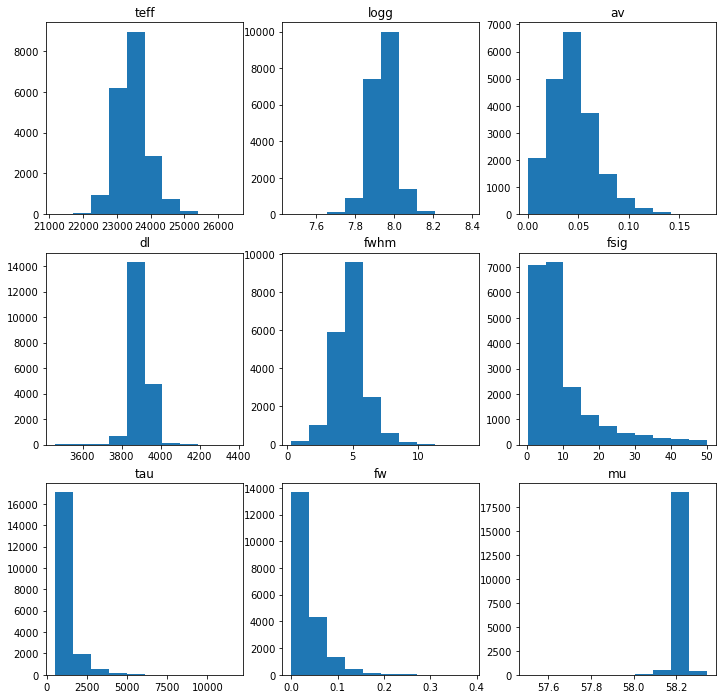

In [12]:
# OK - we can visualize this dataframe in a few different ways
# before we use matplotlib to look at the bivariate distributions, lets look at the univariate distributions
fig = plt.figure(figsize=(12, 12))

# we can loop over each column - the column indices are the same as the indices in names
for i, name in enumerate(names):
    # let's create a new axes for each plot
    # the format is total number of rows, total number of columns, current index starting with 1
    ax = fig.add_subplot(3, 3, i+1)
    
    # we don't need all 2 million samples to get some idea of the distribution
    # lets downsample by picking every 100th
    # the slicing for numpy arrays works as [start:stop:step]
    # if we don't specify start and stop, the defaults are 0 and -1 (the first and last elements)
    # we can just write that as [::step]
    ax.hist(pos[:,i][::100])
    ax.set_title(name)


In [13]:
# so several different distributions with very different shapes 
# and not all of them are symmetric even

# we'll just plot the first two columns for now
# and use the same downsampling by a factor of 100 to reduce the volume of data we're looking at

x = pos[:,0][::100]
y = pos[:,1][::100]

Text(0, 0.5, 'logg')

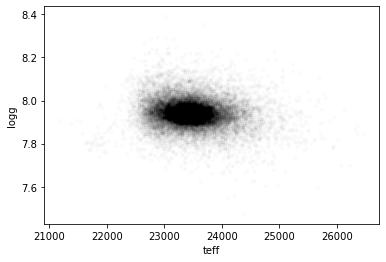

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y, marker='.', color='k', alpha=0.01)
ax.set_xlabel(names[0])
ax.set_ylabel(names[1])

In [15]:
# not bad, but the center of this multivariate data is still hard to get a sense for
# let's use seaborn's jointplot which is specifically designed for the job of looking at bivariate data

import seaborn as sns

In [16]:
# we could just pass the vectors we saved to jointplot, but we downsampled them by a factor of 100
# seaborn won't have a problem with the large number of points if we're plotting a 2D histogram
# so lets use pandas to get all the data into seaborn as a dataframe

import pandas as pd
df = pd.DataFrame(pos[:,0:2], columns=[names[0],names[1]])

In [17]:
# let's make sure the dataframe has everything
df

,teff,logg
0,21631.851562,7.801262
1,21591.556641,7.804831
2,21779.921875,7.803291
3,21700.144531,7.788880
4,21863.031250,7.854690
...,...,...
1999995,23887.169922,8.187648
1999996,24596.712891,7.885874
1999997,23540.755859,8.144714
1999998,25513.160156,7.833400


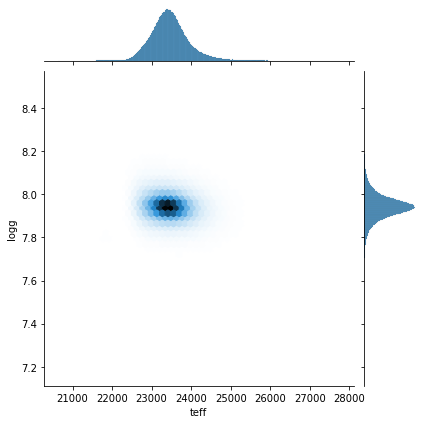

In [18]:
sns.jointplot(x='teff', y='logg', data=df, kind='hex')

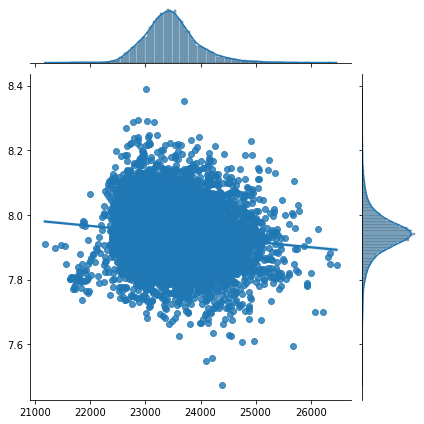

In [19]:
# Cool - we're not just getting a density plot, we're getting a 1D marginalization along both axes
# all with less work than matplotlib
# there's many ways to do things, but some ways are easier/apparently better than others

# we can also have seaborn just plot the vectors directly and do things like regression
sns.jointplot(x=x, y=y, kind='reg')

Hmm - the regression doesn't really look very good - there's some covariance between the two parameters but it's fairly weak - there's another way to get a sense of density. Look at this topographic map. Here' we're using contours to indicate density.

<img src="https://sitesmedia.s3.amazonaws.com/creekconnections/files/2014/09/topomap.jpg">

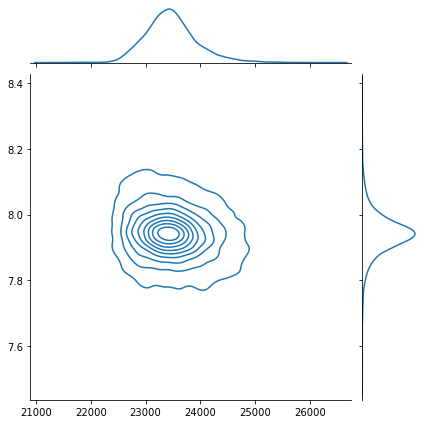

In [20]:
# seaborn can produce the same sort of output 
# using a technique called a kernel density estimate that we'll learn about soon

sns.jointplot(x=x, y=y, kind='kde')

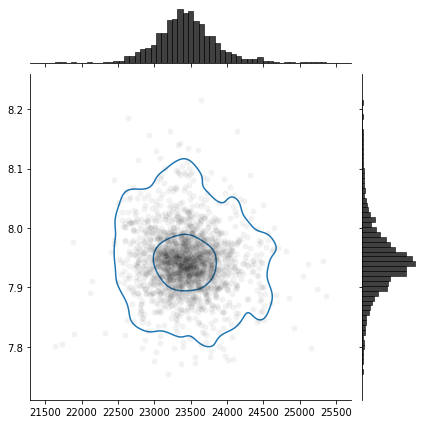

In [21]:
# you can even combine scatter plots and contours together with seaborn
sns.jointplot(x=x[::10], y=y[::10], color='k', alpha=0.05).plot_joint(sns.kdeplot, zorder=0, n_levels=3)

In [22]:
# Of course, we only dealt with bivariate data in class
# this was multivariate data
# if you want to visualize all of it, there's other dedicated tools
# this will let you make what is called a corner plot - a sequence of joint plots for visualizing multivariate data
import corner

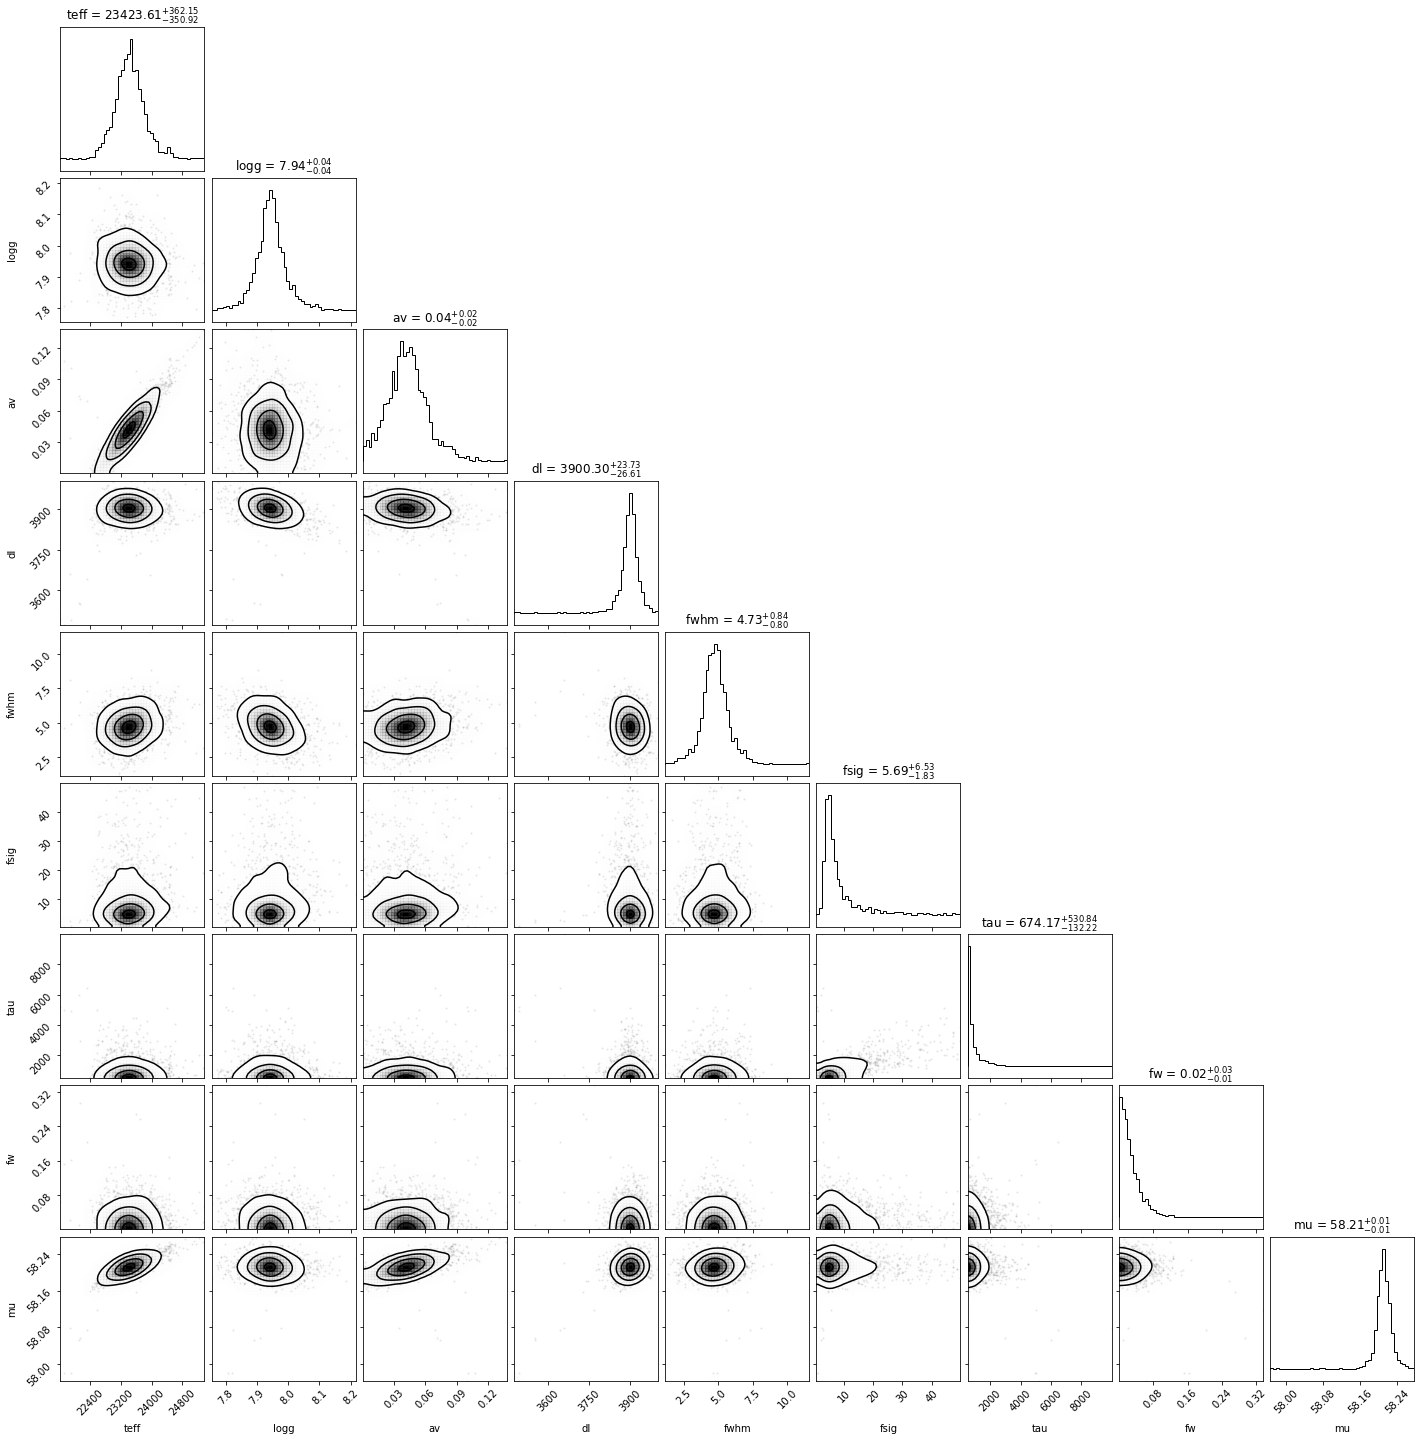

In [23]:
fig = corner.corner(pos[::1000,:], bins=50, color='k', smooth=2, labels=names, show_titles=True, scale_hist=True)
show(fig)

You are well armed to tackle visualizing any multivariate datasets this semester, and hopefully have a sense for marginalizations (the 1D histograms) as well. 